<a href="https://colab.research.google.com/github/Leshma2210/codsoft/blob/main/codsoft_TITANIC_SURVIVAL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns


In [ ]:

x_df = pd.read_csv("tested.csv")
y_df = pd.read_csv("tested.csv")


In [ ]:

y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
y_df.head(8)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S


In [ ]:
total= y_df.isnull().sum().sort_values(ascending=False)
per_1 = y_df.isnull().sum()/y_df.isnull().count()*100
per_2 = (round(per_1, 1)).sort_values(ascending=False)
miss_data = pd.concat([total, per_2], axis=1, keys=['Total', '%'])
miss_data.head(5)

,Total,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
PassengerId,0,0.0
Survived,0,0.0


In [ ]:
y_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

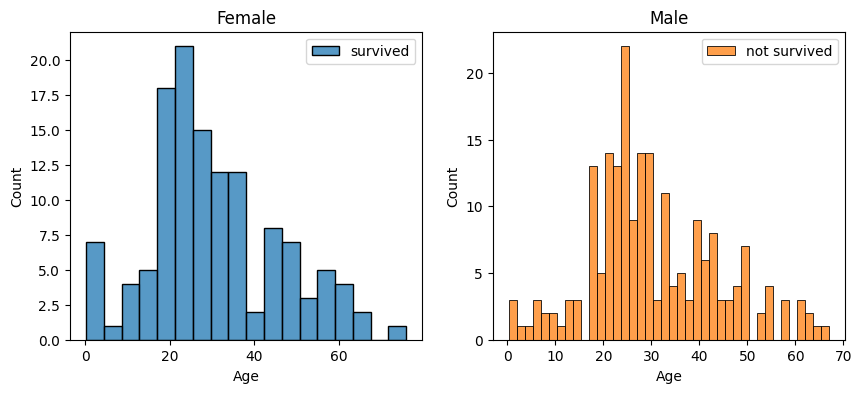

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = y_df[y_df['Sex']=='female']
men = y_df[y_df['Sex']=='male']
ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_= ax.set_title('Male')


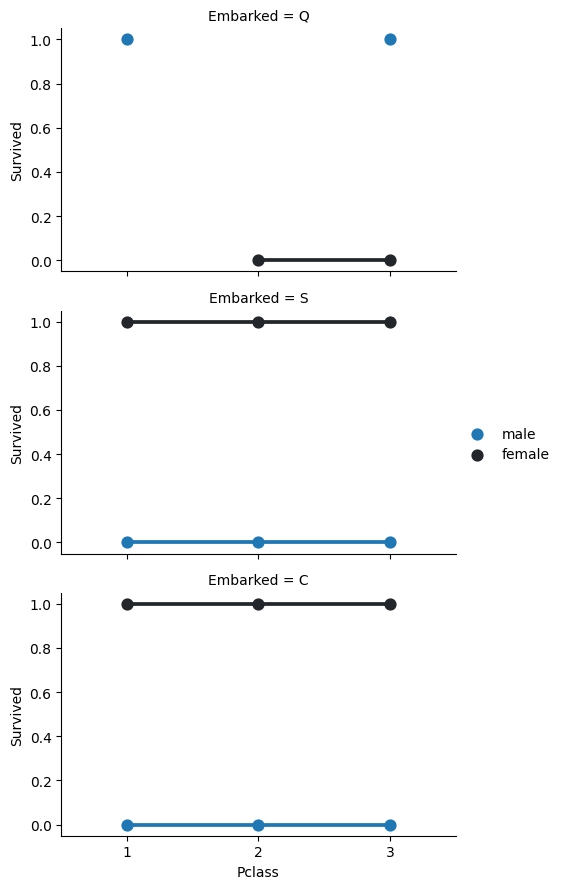

In [ ]:
FacetGrid = sns.FacetGrid(y_df, row='Embarked', aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()




<Axes: xlabel='Pclass', ylabel='Survived'>

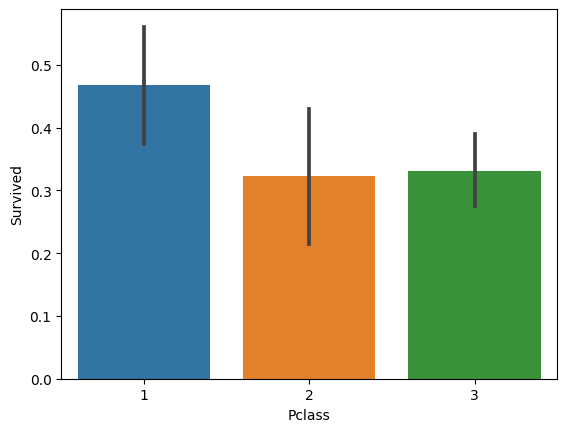

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=y_df)

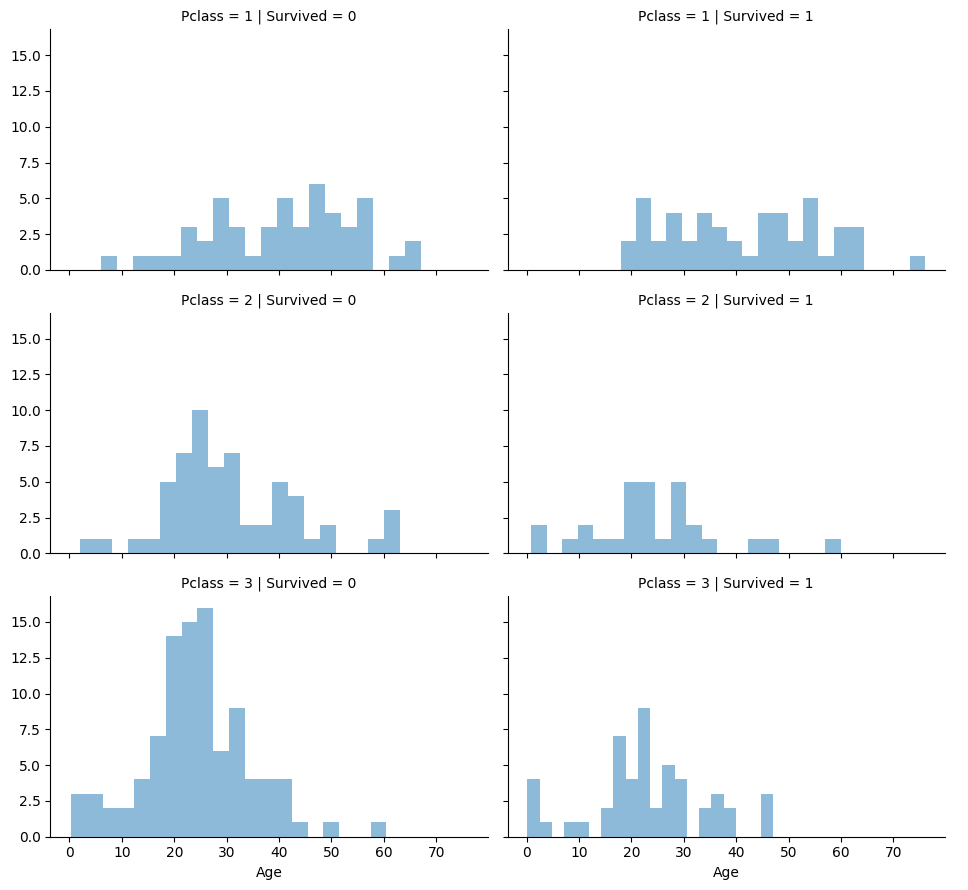

In [ ]:
grid = sns.FacetGrid(y_df, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();


In [ ]:

data = [y_df, x_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
y_df['not_alone'].value_counts()

1    253
0    165
Name: not_alone, dtype: int64

In [ ]:
y_df = y_df.drop(['PassengerId'], axis=1)


In [ ]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [y_df, x_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
y_df = y_df.drop(['Cabin'], axis=1)
x_df = x_df.drop(['Cabin'], axis=1)

In [ ]:
data = [y_df, x_df]

for dataset in data:
    mean = y_df["Age"].mean()
    std = x_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = y_df["Age"].astype(int)
y_df["Age"].isnull().sum()


0

In [ ]:
y_df['Embarked'].describe()

count     418
unique      3
top         S
freq      270
Name: Embarked, dtype: object

In [ ]:
common_value = 'S'
data = [y_df, x_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [ ]:
y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   418 non-null    int64  
 1   Pclass     418 non-null    int64  
 2   Name       418 non-null    object 
 3   Sex        418 non-null    object 
 4   Age        418 non-null    int64  
 5   SibSp      418 non-null    int64  
 6   Parch      418 non-null    int64  
 7   Ticket     418 non-null    object 
 8   Fare       417 non-null    float64
 9   Embarked   418 non-null    object 
 10  relatives  418 non-null    int64  
 11  not_alone  418 non-null    int64  
 12  Deck       418 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 42.6+ KB


In [ ]:
data = [y_df, x_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:

data = [y_df, x_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
y_df = y_df.drop(['Name'], axis=1)
x_df = x_df.drop(['Name'], axis=1)

In [ ]:
genders = {"male": 0, "female": 1}
data = [y_df, x_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [ ]:
y_df['Ticket'].describe()

count          418
unique         363
top       PC 17608
freq             5
Name: Ticket, dtype: object

In [ ]:
y_df = y_df.drop(['Ticket'], axis=1)
x_df = x_df.drop(['Ticket'], axis=1)

In [ ]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [y_df, x_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)


In [ ]:
data = [y_df, x_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6


In [ ]:
y_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,5,0,0,7,2,0,1,8,1
1,1,3,1,6,1,0,7,0,1,0,8,3
2,0,2,0,6,0,0,9,2,0,1,8,1
3,0,3,0,3,0,0,8,0,0,1,8,1
4,1,3,1,2,1,1,12,0,2,0,8,3


In [ ]:
data = [y_df, x_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
data = [y_df, x_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [ ]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
# Let's take a last look at the training set, before we start training the models.
y_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,5,0,0,0,2,0,1,8,1,15,0
1,1,3,1,6,1,0,0,0,1,0,8,3,18,0
2,0,2,0,6,0,0,1,2,0,1,8,1,12,1
3,0,3,0,3,0,0,1,0,0,1,8,1,9,1
4,1,3,1,2,1,1,1,0,2,0,8,3,6,0


In [ ]:

X_y = y_df.drop("Survived", axis=1)
Y_y = y_df["Survived"]
X_x  = x_df.drop("PassengerId", axis=1).copy()


In [ ]:
from sklearn import linear_model
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_y, Y_y)
Y_pred = sgd.predict(X_y)

sgd.score(X_y, Y_y)

acc_sgd = round(sgd.score(X_y, Y_y) * 100, 5)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_y, Y_y)

Y_prediction = random_forest.predict(X_y)

random_forest.score(X_y, Y_y)
acc_random_forest = round(random_forest.score(X_y, Y_y) * 100, 5)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_y, Y_y)
Y_pred = knn.predict(X_y)
acc_knn = round (knn.score(X_y,Y_y) * 100, 5)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
sgd = DecisionTreeClassifier()
sgd.fit(X_y, Y_y)
Y_pred = sgd.predict(X_y)
acc_decision_tree = round(sgd.score(X_y, Y_y)* 100, 5)

In [ ]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN',
              'Random Forest','Decision Tree'],
    'Score': [ acc_knn, acc_random_forest,
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)


,Model
Score,
100.00000,KNN
100.00000,Decision Tree
99.52153,Random Forest
96.41148,Support Vector Machines
